#  Predicting whether  a person is legible for getting a home loan or not
In this notebook we are going to go through an end_to_end classification problem of predicting whether a person is legible for a home loan or not

**Problem_definition->**How well can we predict whether a person is legible for accessing a home loan or not given the input features and their labels,training a machine learning model with data of past users who had accessed the home loan before 

**Data->**The data has been provided to us by kaggle 

    **Description of the data**:
       Home_loan_train.csv->This is the training data..It contains the features and the variables 
       Home_loan_test.csv->This is the testing data that we shall use to make predictions with..it can be diffrentiated from the training data in that it does not contain the labels
       
**Evaluation**->The evaluation metric for this problem is the **accuracy_score**

## Import all the libraries we are going to use in the notebook






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import all the models we are going to use in the notebook
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#import the model_evaluation
from sklearn.metrics import accuracy_score

## Load in the data


In [5]:
df=pd.read_csv("Home_loan_train.csv")
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [6]:
#check if there are any missing values
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

##  Our dataset has no missing values 

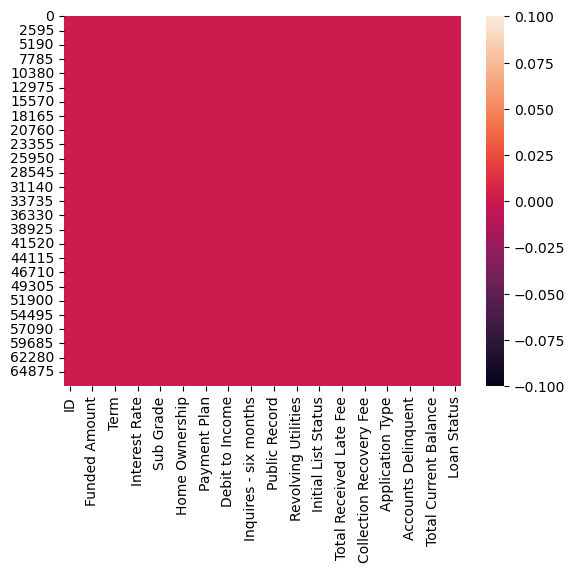

In [7]:
# Get visual
sns.heatmap(df.isna());

## Exploratory data analysis

In [8]:
#check te value counts of te target column
df["Loan Status"].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

### First thing we notice from te value counts of the target column is that the dataset is imbalanced 

Imbalanced dataset meaning we have to resample the dataset and work with the same number of classes ...We shall deal we that later when we will be preparing our dataset for modelling

In [9]:
# information of the various columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [10]:
#check the description of the numerical columns in the dataframe
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


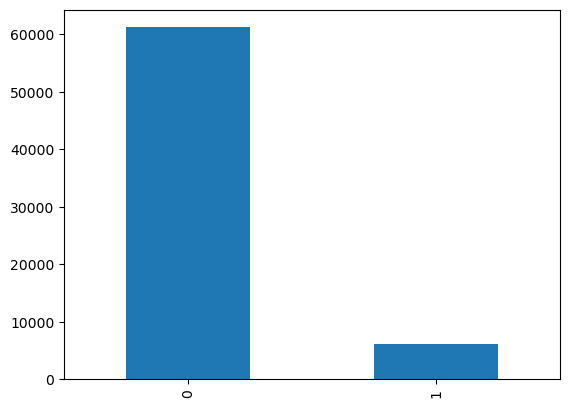

In [14]:
df["Loan Status"].value_counts().plot(kind="bar");

##  We can can clearly see the dataset is imbalanced having many of the samples as 0 meaning did not default the loan and 1 meaning loan defaulters 

## Exploratory data analysis


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

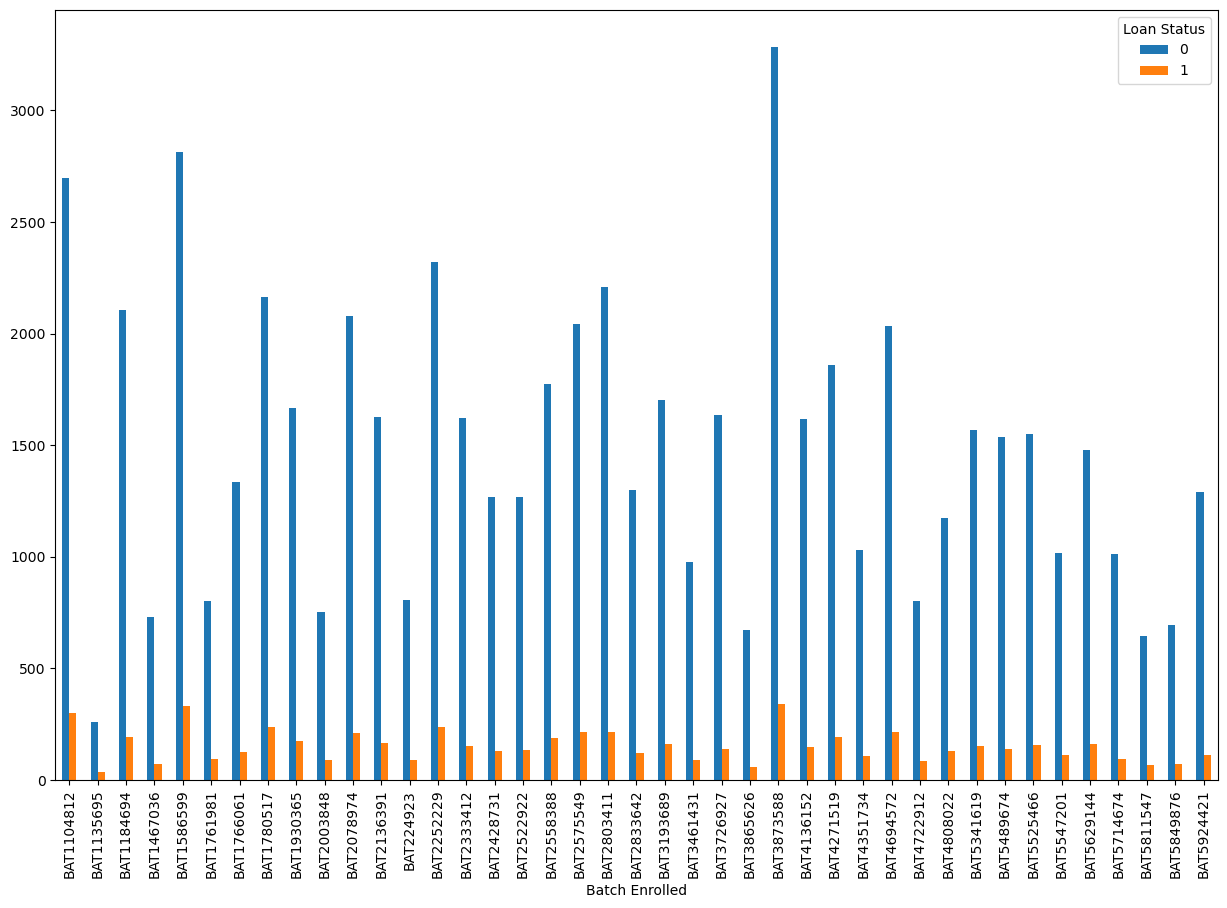

In [17]:
pd.crosstab(df["Batch Enrolled"],df["Loan Status"]).plot(kind="bar",
                                                        figsize=(15,10));

In [18]:
df["Verification Status"].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

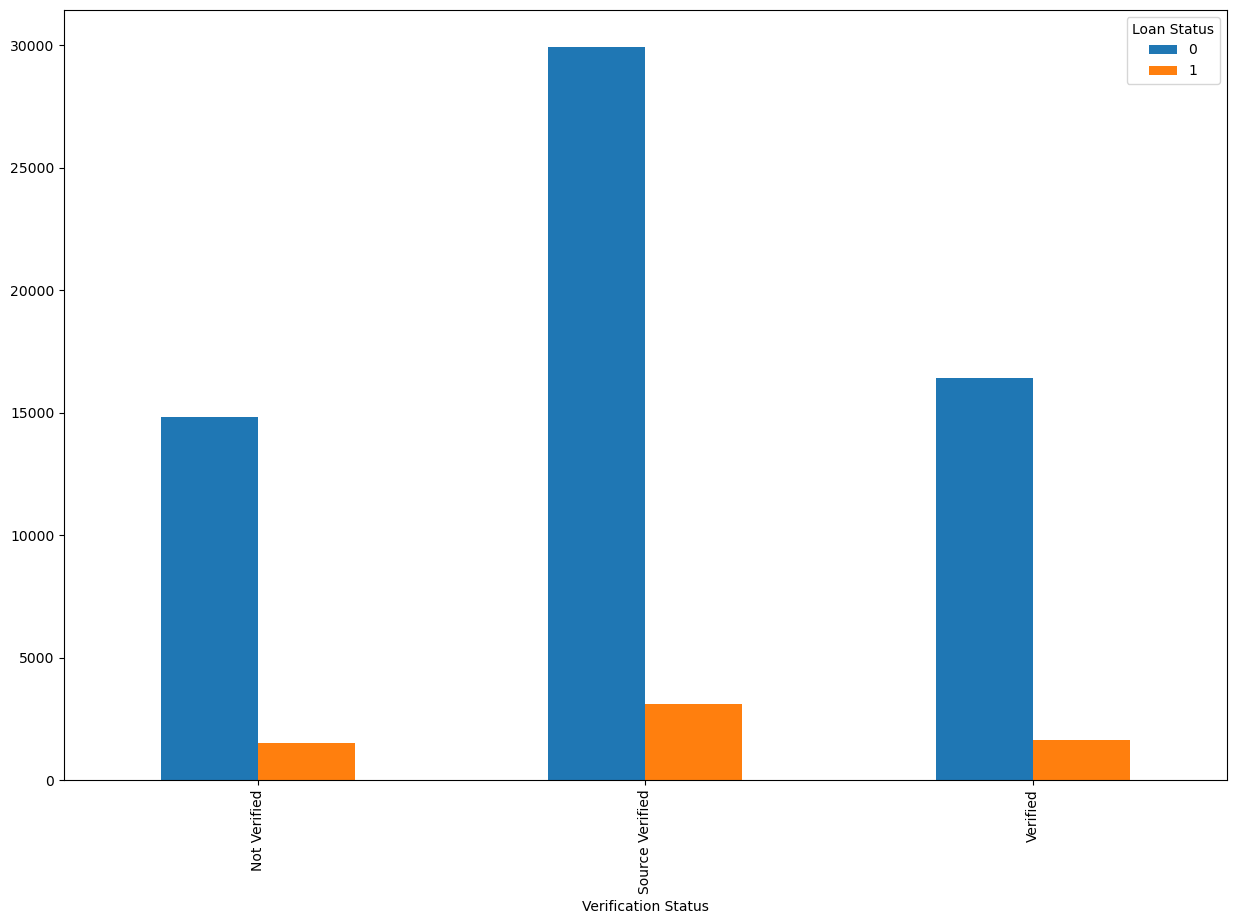

In [19]:
pd.crosstab(df["Verification Status"],df["Loan Status"]).plot(kind="bar",
                                                             figsize=(15,10));

In [23]:
df["Loan Title"].value_counts()

Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64

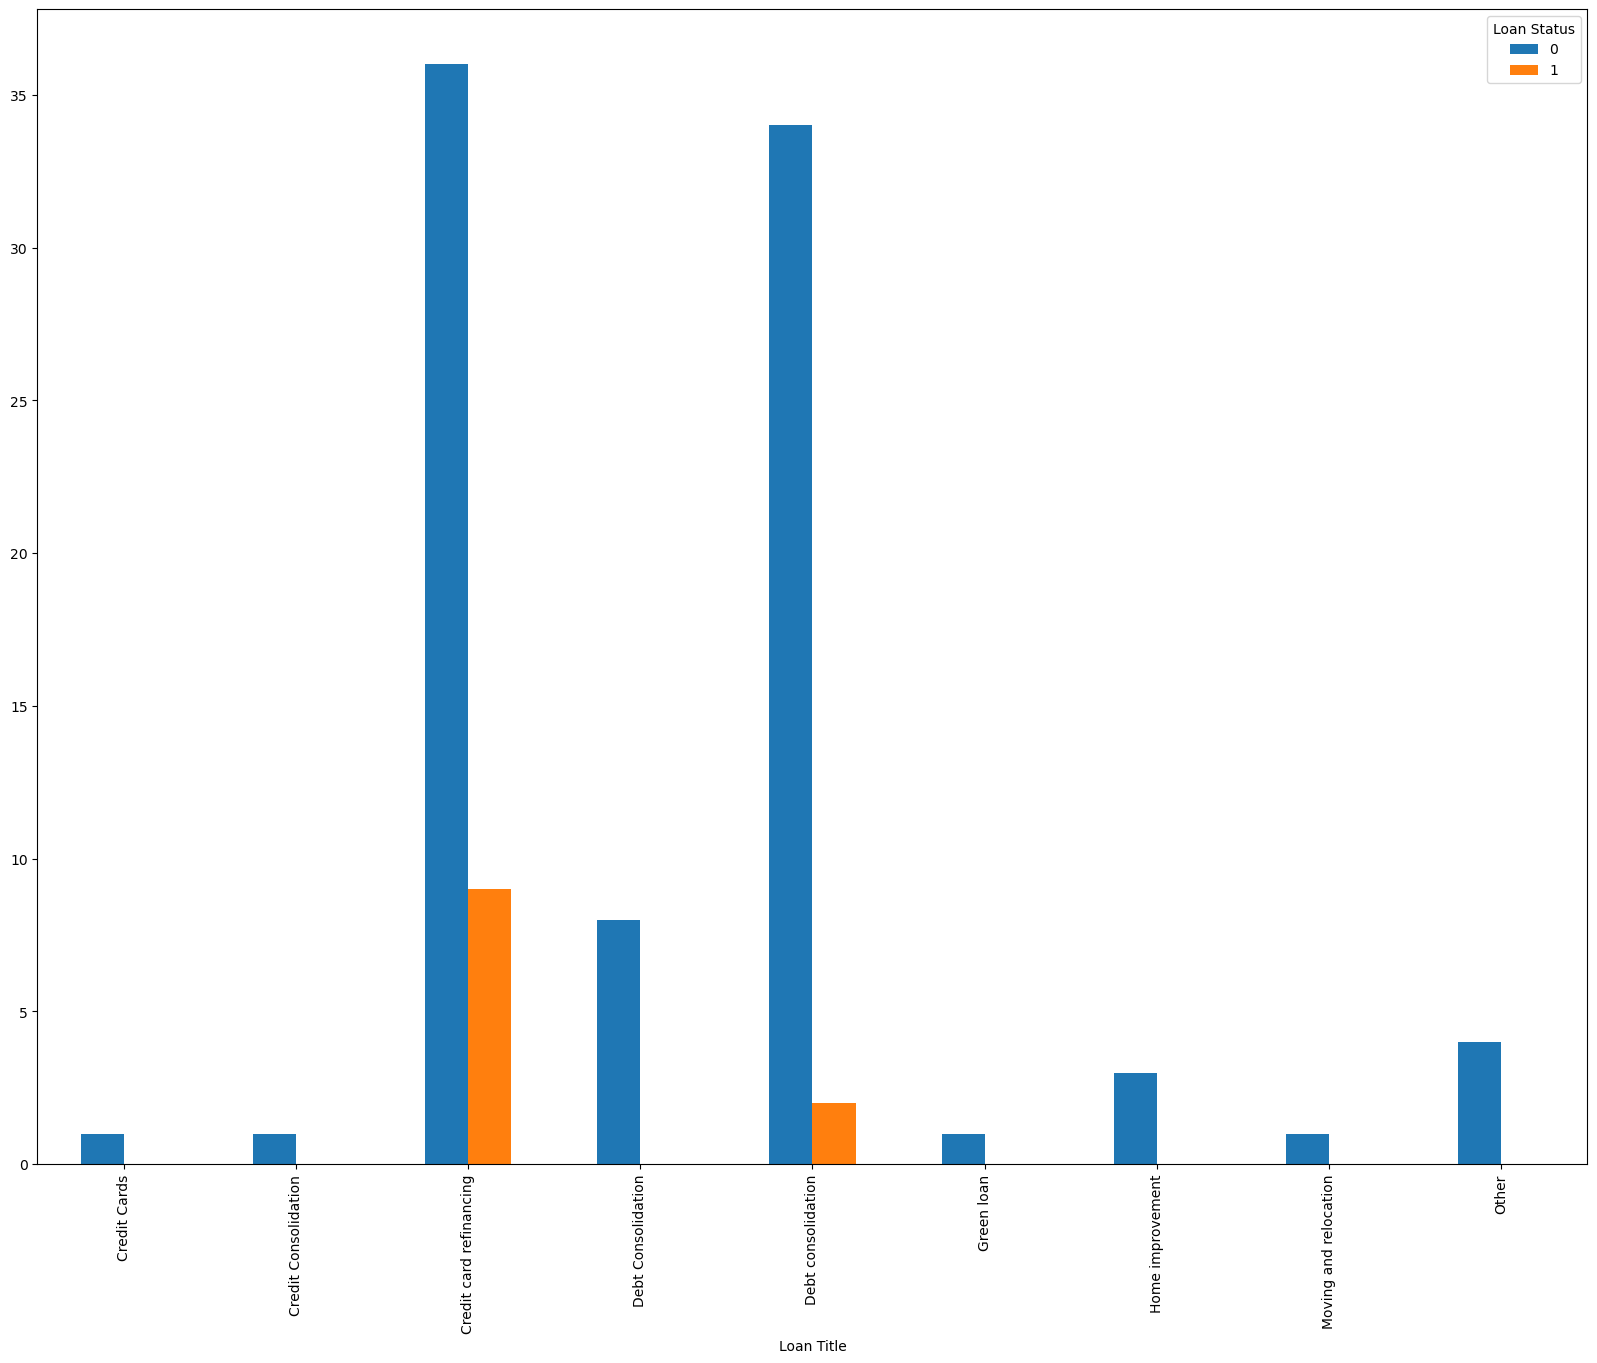

In [27]:
pd.crosstab(df["Loan Title"][:100],df["Loan Status"][:100]).plot(kind="bar",
                                                      figsize=(20,15));

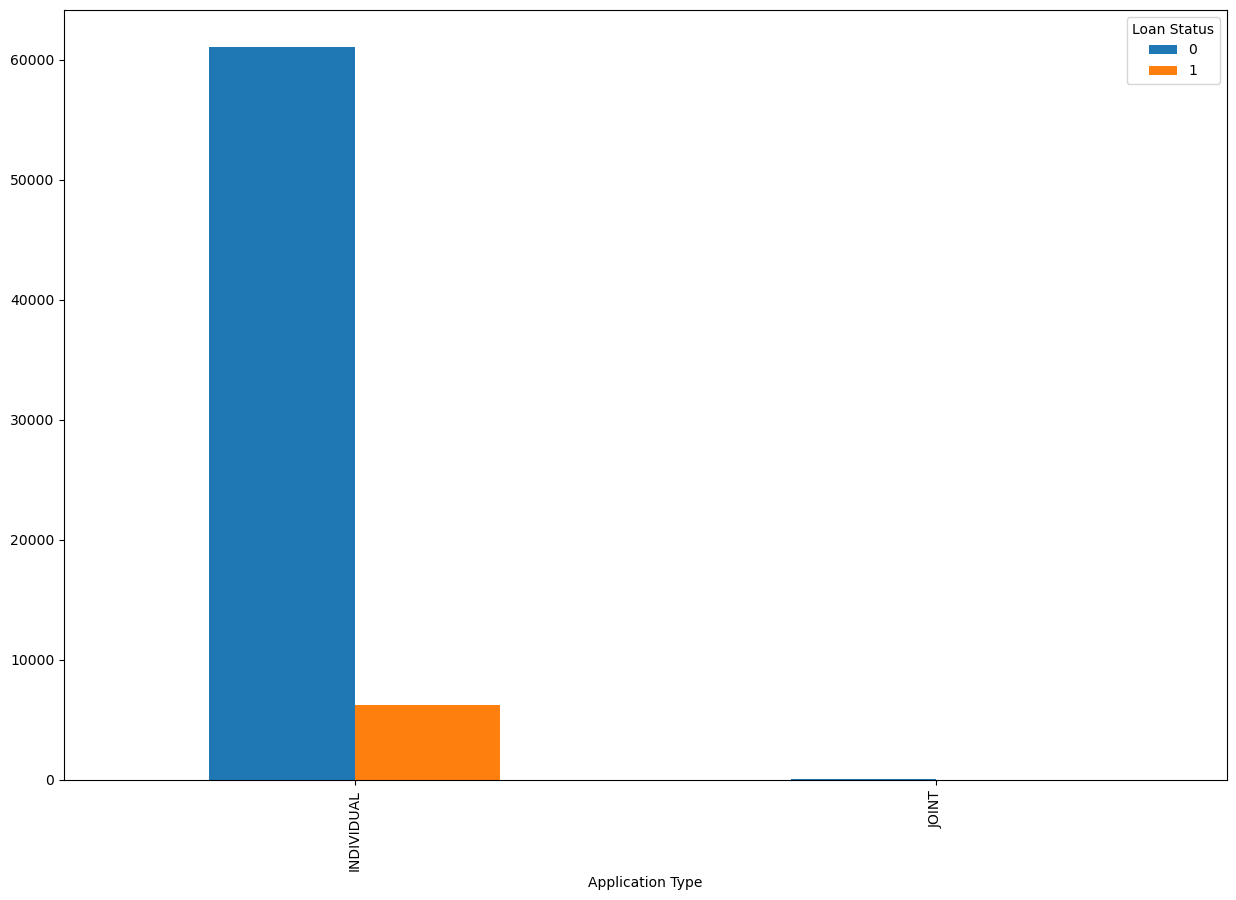

In [30]:
pd.crosstab(df["Application Type"],df["Loan Status"]).plot(kind="bar",
                                                          figsize=(15,10));

In [32]:
# check which of the columns have numeric contents
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Batch Enrolled
Grade
Sub Grade
Employment Duration
Verification Status
Payment Plan
Loan Title
Initial List Status
Application Type


In [33]:
#convert the non_numeric columns into categorical
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        #keep the label and add convert the string to categorical
        df[label]=content.astype("category").cat.as_ordered()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            67463 non-null  int64   
 1   Loan Amount                   67463 non-null  int64   
 2   Funded Amount                 67463 non-null  int64   
 3   Funded Amount Investor        67463 non-null  float64 
 4   Term                          67463 non-null  int64   
 5   Batch Enrolled                67463 non-null  category
 6   Interest Rate                 67463 non-null  float64 
 7   Grade                         67463 non-null  category
 8   Sub Grade                     67463 non-null  category
 9   Employment Duration           67463 non-null  category
 10  Home Ownership                67463 non-null  float64 
 11  Verification Status           67463 non-null  category
 12  Payment Plan                  67463 non-null  

In [35]:
#convert the categorical columns into numerical

for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  int8   
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  int8   
 8   Sub Grade                     67463 non-null  int8   
 9   Employment Duration           67463 non-null  int8   
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  int8   
 12  Payment Plan                  67463 non-null  int8   
 13  L

## End of Exploratory data analysis

We have turned all our data into numbers and also ensured that all of the data is no missing values...But remember we noticed our dataset is imbalanced and we have to deal with this one 

In [40]:
!pip install imblearn

In [42]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [43]:
X=df.drop("Loan Status",axis=1)
y=df["Loan Status"]
X,y

(             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
 0      65087372        10000          32236             12329.36286    59   
 1       1450153         3609          11940             12191.99692    59   
 2       1969101        28276           9311             21603.22455    59   
 3       6651430        11170           6954             17877.15585    59   
 4      14354669        16890          13226             13539.92667    59   
 ...         ...          ...            ...                     ...   ...   
 67458  16164945        13601           6848             13175.28583    59   
 67459  35182714         8323          11046             15637.46301    59   
 67460  16435904        15897          32921             12329.45775    59   
 67461   5300325        16567           4975             21353.68465    59   
 67462  65443173        15353          29875             14207.44860    59   
 
        Batch Enrolled  Interest Rate  Grade  Sub Grade  Emplo

In [44]:
X.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,65087372,10000,32236,12329.36286,59,16,11.135007,1,13,0,...,0.102055,2.498291,0.793724,0,0,49,0,31,311301,6619
1,1450153,3609,11940,12191.99692,59,4,12.237563,2,17,2,...,0.036181,2.377215,0.974821,0,0,109,0,53,182610,20885
2,1969101,28276,9311,21603.22455,59,11,12.545884,5,18,0,...,18.778660,4.316277,1.020075,0,0,66,0,34,89801,26155
3,6651430,11170,6954,17877.15585,59,15,16.731201,2,12,0,...,0.044131,0.107020,0.749971,0,0,39,0,40,9189,60214
4,14354669,16890,13226,13539.92667,59,32,15.008300,2,18,0,...,19.306646,1294.818751,0.368953,0,0,18,0,430,126029,22579


In [46]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    1
Name: Loan Status, dtype: int64

In [48]:
nm=NearMiss()
X_res,y_res=nm.fit_resample(X,y)


In [49]:
X_res.shape,y_res.shape

((12482, 34), (12482,))

In [50]:
y_res.value_counts()

0    6241
1    6241
Name: Loan Status, dtype: int64

In [53]:
from collections import Counter
print(f"Original dataset shape:{Counter(y)}")
print(f"Resampled dataset shape counter:{Counter(y_res)}")

Original dataset shape:Counter({0: 61222, 1: 6241})
Resampled dataset shape counter:Counter({0: 6241, 1: 6241})


##  The dataset is now perfectly balanced having both of the samples(0&1) at 6241 samples...Perfectly balanced 

We can now build a machine learning model...fit the training data and evaluate the datas using the validation dataset before making predictions with the test dataset

We shall create two models:

    * RandomForestClassifier()
    * LogisticRegression model()

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
# Split the data into training and validation splits 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,
                                              y_res,
                                              test_size=0.1,
                                              random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11233, 34), (1249, 34), (11233,), (1249,))

In [59]:
#fit the randomforest model
model_1=RandomForestClassifier()
model_1.fit(X_train,y_train)
model_1_preds=model_1.predict(X_test)

In [60]:
model_1_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,model_1_preds)
accuracy

0.8062449959967974

In [62]:
model_2=LogisticRegression()
model_2.fit(X_train,y_train)
model_2_preds=model_2.predict(X_test)
model_2_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [64]:
accuracy_2=accuracy_score(y_test,model_2_preds)
accuracy_2

0.7165732586068855

##  RandomForest model perfoms the best and hence we shall use it to make predictions on the test dataset

## Load in the test dataset and prepare it to be in the same format as the training data for making predictions

In [65]:
df_test=pd.read_csv("home_loan_test.csv")
df_test

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,BAT5629144,16.240000,C,C5,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,NaN
28909,11538258,25000,25000,25000.000000,60,BAT5629144,14.980000,C,C3,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,NaN
28910,13147685,30000,30000,29950.000000,60,BAT2136391,18.240000,D,D5,MORTGAGE,...,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,NaN
28911,13917689,25000,25000,24950.000000,60,BAT2136391,15.610000,D,D1,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,NaN


In [66]:
df_test.shape

(28913, 35)

In [68]:
#check if there are any missing values 
df_test.isna().sum()

ID                                  0
Loan Amount                         0
Funded Amount                       0
Funded Amount Investor              0
Term                                0
Batch Enrolled                      0
Interest Rate                       0
Grade                               0
Sub Grade                           0
Employment Duration                 0
Home Ownership                      0
Verification Status                 0
Payment Plan                        0
Loan Title                          0
Debit to Income                     0
Delinquency - two years             0
Inquires - six months               0
Open Account                        0
Public Record                       0
Revolving Balance                   0
Revolving Utilities                 0
Total Accounts                      0
Initial List Status                 0
Total Received Interest             0
Total Received Late Fee             0
Recoveries                          0
Collection R

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [73]:
#convert the categorical columns into numerical
#convert the non_numeric columns into categorical
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        #keep the label and add convert the string to categorical
        df_test[label]=content.astype("category").cat.as_ordered()

In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID                            28913 non-null  int64   
 1   Loan Amount                   28913 non-null  int64   
 2   Funded Amount                 28913 non-null  int64   
 3   Funded Amount Investor        28913 non-null  float64 
 4   Term                          28913 non-null  int64   
 5   Batch Enrolled                28913 non-null  category
 6   Interest Rate                 28913 non-null  float64 
 7   Grade                         28913 non-null  category
 8   Sub Grade                     28913 non-null  category
 9   Employment Duration           28913 non-null  category
 10  Home Ownership                28913 non-null  float64 
 11  Verification Status           28913 non-null  category
 12  Payment Plan                  28913 non-null  

In [75]:
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label]=pd.Categorical(content).codes

In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  int8   
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  int8   
 8   Sub Grade                     28913 non-null  int8   
 9   Employment Duration           28913 non-null  int8   
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  int8   
 12  Payment Plan                  28913 non-null  int8   
 13  L

## All of the test data does contain numerical values as for now and hence we can now comfortably make predictions with the test data

In [79]:
len(df.columns)

35

In [80]:
set(df.columns)-set(df_test.columns)

set()

In [83]:
df_test.drop("Loan Status",axis=1,inplace=True)
df_test.shape

(28913, 34)

In [85]:
df_test.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [86]:
set(df.columns)-set(df_test.columns)

{'Loan Status'}

## Thankyou jupyter notebooks

### Making predictions

In [87]:
test_predictions=model_1.predict(df_test)
test_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [90]:
test_predictions.shape

(28913,)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [95]:
final_preds=pd.DataFrame()
final_preds["ID"]=df_test["ID"]
final_preds["predictions"]=test_predictions
final_preds

,ID,predictions
0,56492997,1
1,22540813,1
2,9862181,1
3,10097822,0
4,47771809,1
...,...,...
28908,11537800,1
28909,11538258,1
28910,13147685,1
28911,13917689,1


In [97]:
final_preds["predictions"].value_counts()

1    23414
0     5499
Name: predictions, dtype: int64